# Interacting with CLIP

This is a self-contained notebook that shows how to download and run CLIP models, calculate the similarity between arbitrary image and text inputs, and perform zero-shot image classifications.

# Preparation for Colab

Make sure you're running a GPU runtime; if not, select "GPU" as the hardware accelerator in Runtime > Change Runtime Type in the menu. The next cells will install the `clip` package and its dependencies, and check if PyTorch 1.7.1 or later is installed.

In [12]:
! pip install ftfy regex tqdm
! pip install git+https://github.com/openai/CLIP.git

  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-msethgv8
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-msethgv8
  Resolved https://github.com/openai/CLIP.git to commit dcba3cb2e2827b402d2701e7e1c7d9fed8a20ef1
  Preparing metadata (setup.py) ... done


In [17]:
import numpy as np
import torch
import clip
from PIL import Image
import matplotlib.pyplot as plt

device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)

Label probs: [[1.428e-04 9.976e-01 7.839e-04 1.572e-03]]
Predict class: phone


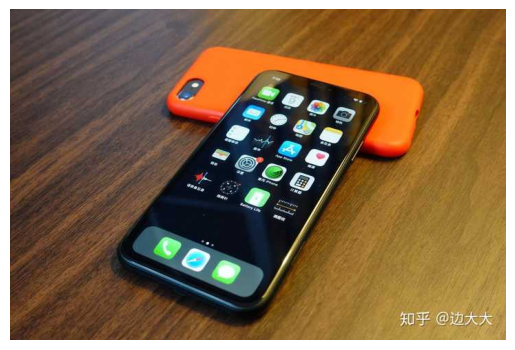

In [21]:
text_list = ["cat", "phone", "dog", "city"]
raw_image = Image.open("phone.jpg")

image = preprocess(raw_image).unsqueeze(0).to(device)
text = clip.tokenize(text_list).to(device)

with torch.no_grad():
  image_feature = model.encode_image(image)
  text_feature = model.encode_text(text)

  logits_per_image, logits_per_text = model(image, text)
  probs = logits_per_image.softmax(dim=-1).cpu().numpy()

print("Label probs:", probs)
print("Predict class:", text_list[probs.argmax()])
plt.axis('off')
plt.imshow(raw_image)
